# Normalisation of dataset

In [3]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
import numpy as np
# from dataio.transformation.imageTransformations import RandomFlipTransform, RandomElasticTransform, RandomAffineTransform, RandomNoiseTransform
from gsprep.visual_tools.dataset_histograms import plot_dataset_histogram, plot_per_sample_histograms

In [8]:
dataset_path = '/Users/julian/stroke_research/data/all_2017_2016/data_set.npz'
n_subj = 144

raw_images = np.load(dataset_path, allow_pickle=True)['ct_inputs'][:n_subj].astype(np.float64)
# raw_labels = np.load(dataset_path, allow_pickle=True)['ct_lesion_GT'][:n_subj].astype(np.uint8)
raw_labels = np.load(dataset_path, allow_pickle=True)['lesion_GT'][:n_subj].astype(np.float64)
raw_mask = np.load(dataset_path, allow_pickle=True)['brain_masks'][:n_subj]
params = np.load(dataset_path, allow_pickle=True)['params']

raw_images.shape

(144, 79, 95, 79, 4)

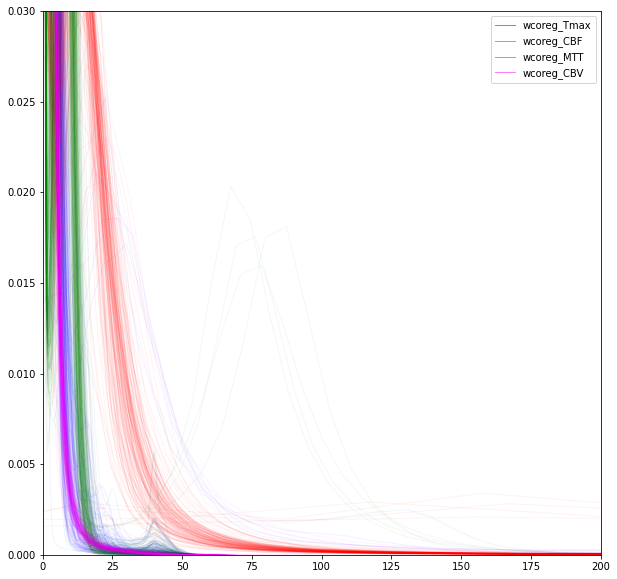

In [9]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)
n_subj, n_x, n_y, n_z, n_c = raw_images.shape
color_scheme = ['blue', 'red', 'green', 'magenta']
ct_sequences = params.item()['ct_sequences']

for index, (channel, color, label) in enumerate(zip(range(n_c), color_scheme, ct_sequences)):
    plot_dataset_histogram(raw_images[:, ..., channel], num_positions=100, color=color, mask_zero=True, axis=axis,
                           dataset_label=label)
axis.set_xlim(0, 200)
axis.set_ylim(0, 0.03)
leg = axis.legend()
for lh in leg.legendHandles:
    lh.set_alpha(0.5)

Original data histograms


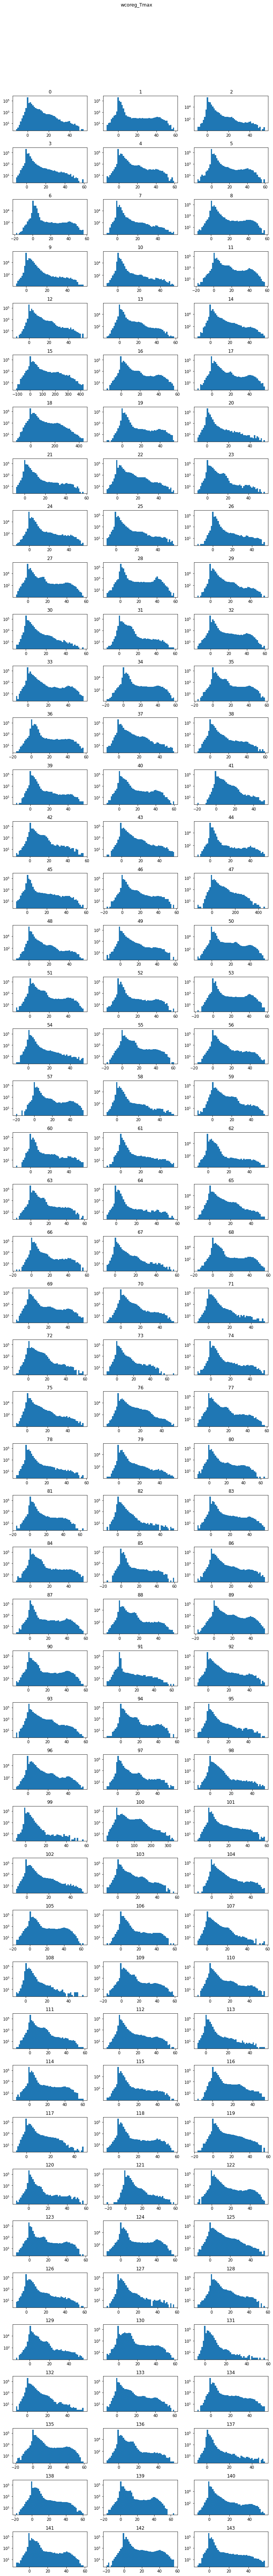

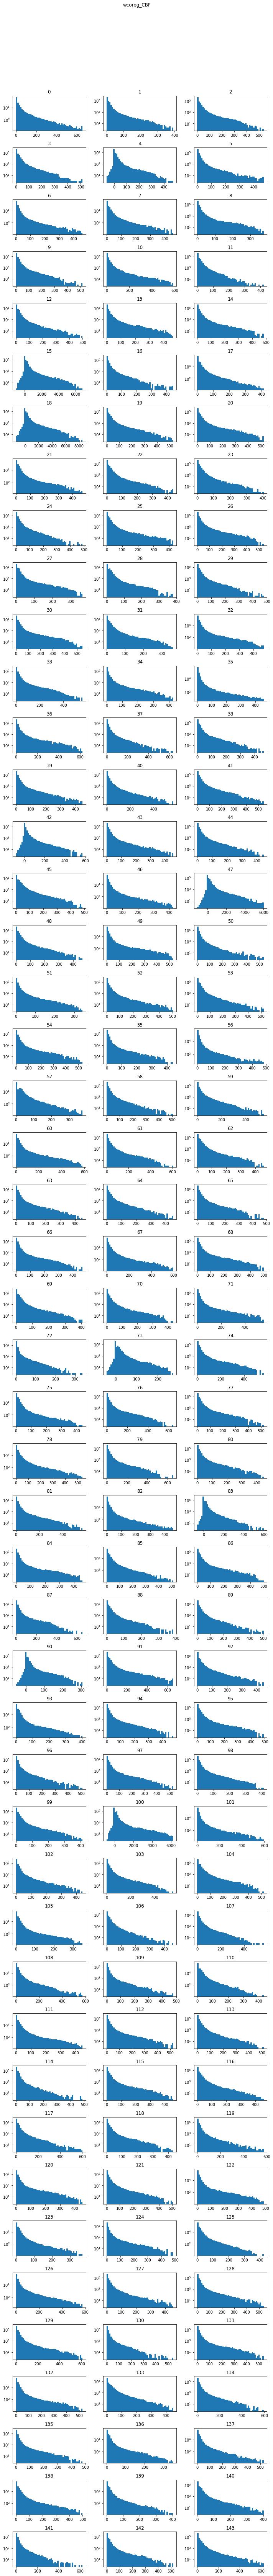

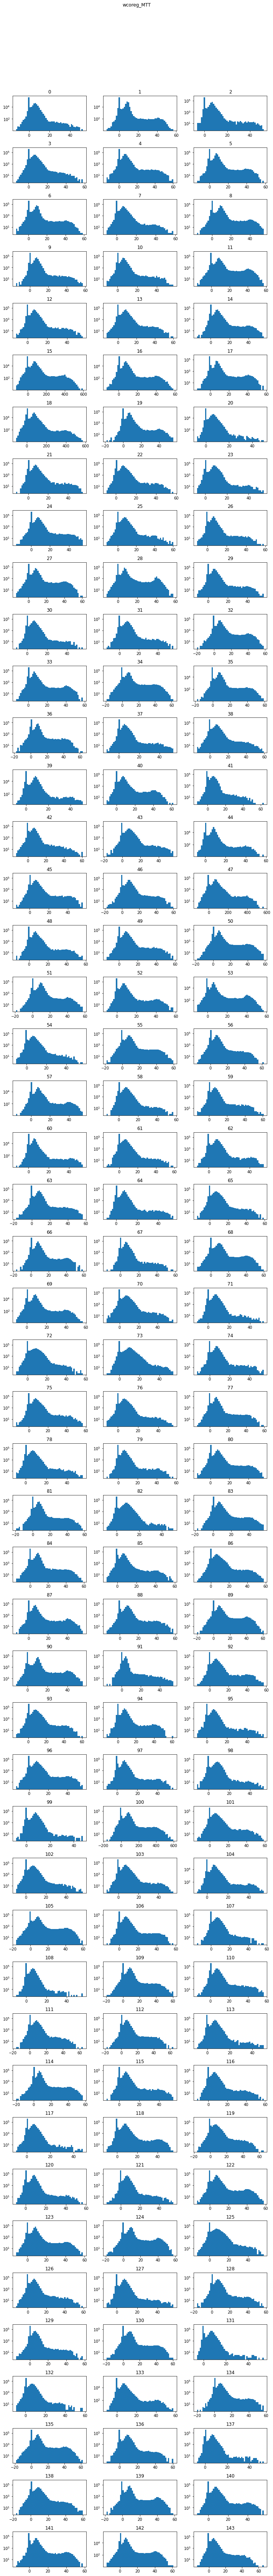

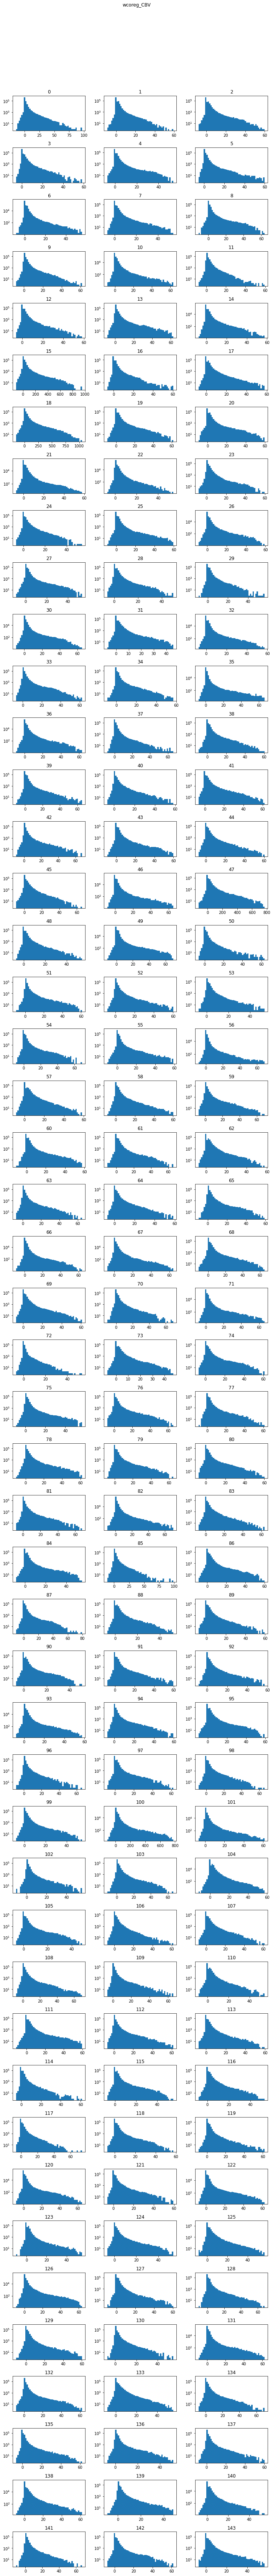

In [11]:
for index, (channel, label) in enumerate(zip(range(n_c), ct_sequences)):
    plot_per_sample_histograms(raw_images[..., channel], log=True, title=label, figsize=(10, 100))
print("Original data histograms")